In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("user_data.csv")

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4]

In [18]:
#from sklearn.preprocessing import StandardScaler

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)

In [29]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [30]:
y_pred = KNN.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [ 3, 29]])

In [33]:
accuracy_score(y_test,y_pred)

0.93

In [38]:
error_rate = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(X_train,y_train)
    ypred_i = KNN.predict(X_test)
    error_rate.append(np.mean(ypred_i != y_pred))

Text(0, 0.5, 'Error Rate')

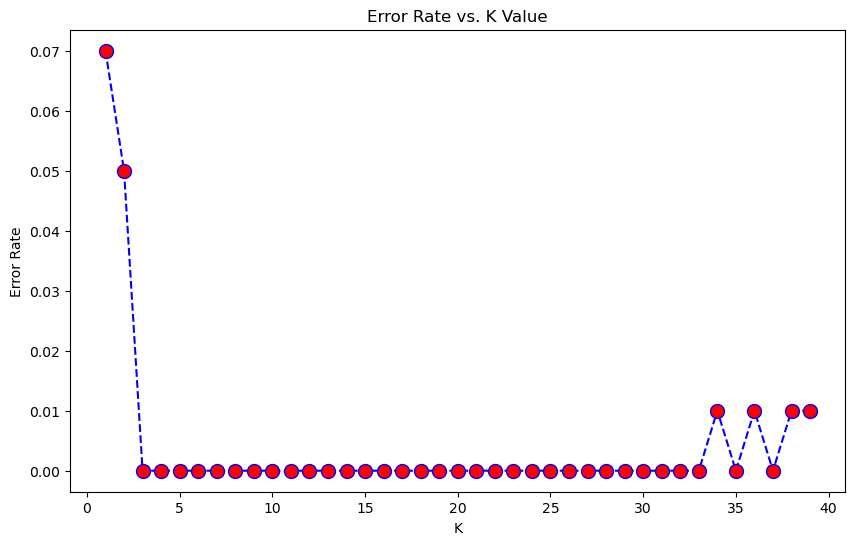

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')